### What are the most optimal skills to learn as a Data Analyst?
#### Methodology 
1) Group skills to dertermine median salary and the likelihood of it being in a job posting
2) Visualize median salary vs percent skill demand 


In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [5]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

df_da_us_exploded = df_da_us.explode('job_skills')
df_da_us_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [15]:
df_da_skills = df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

#Renaming columns for better understanding of data 
df_da_skills = df_da_skills.rename(columns = {'count': 'skill_count', 'median':'median_salary'})

da_job_count = len(df_da_us)

df_da_skills['skill_percent'] = 100 * df_da_skills['skill_count'] / da_job_count

skill_percent = 5 

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills_high_demand



,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


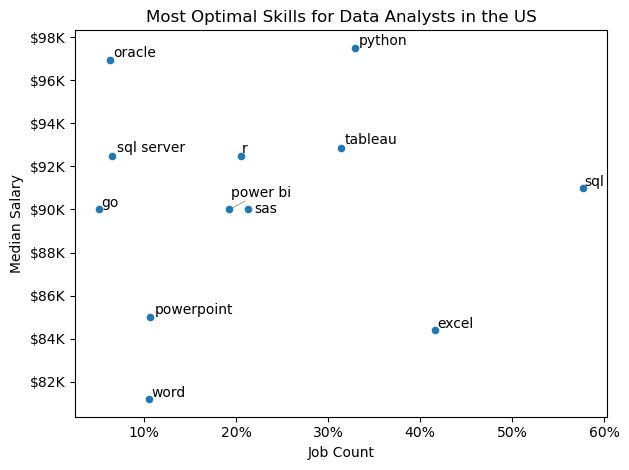

In [19]:
from adjustText import adjust_text

df_da_skills_high_demand.plot(
    kind='scatter',
    x='skill_percent',
    y='median_salary'
)

#creating empty list for adjust text method
texts = []

for i,txt in enumerate(df_da_skills_high_demand.index):
    texts.append(
        plt.text(
        x=df_da_skills_high_demand['skill_percent'].iloc[i], #x coordinate for where text goes
        y=df_da_skills_high_demand['median_salary'].iloc[i], #y coordinate for where text goes
        s=txt #what text goes in the coordinates
        ))
    
#using adjust text method to add arrows to the text to point to the correct point
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

#getting current axis 
ax = plt.gca()
#this code adjusts the y axis so you can format it however you want 
#in this code I use a lambda function to change the values to a different format
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#adjusting titles, labels and legends
plt.title(f'Most Optimal Skills for Data Analysts in the US')
plt.ylabel('Median Salary')
plt.xlabel('Job Count')

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

#adjusting layout and display of the plot 
plt.tight_layout()
plt.show()